In [28]:
import pandas as pd
import numpy as np

In [29]:
data=pd.read_csv('train_titanic dataset.csv')
df=pd.read_csv('test_titanic dataset.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
print(data.isna().sum()) # To see witch column has nan values
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [31]:
reviews=data[pd.isnull(data['Age'])]  #for detecting the missing values
reviews.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [32]:
data=data.drop(columns=['Name','Ticket','Cabin'])  #droping all the unnecessary columns
df=df.drop(columns=['Name','Ticket','Cabin'])
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [33]:
#data=data.dropna() #droping all the rows with a null value
#df=df.dropna()
data['Age']=data['Age'].fillna(data['Age'].mean())
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
data['Embarked']=data['Embarked'].map({ 'S':0,'C':1,'Q':2,np.nan:0}).astype(int)
df['Embarked']=df['Embarked'].map({ 'S':0,'C':1,'Q':2,np.nan:0}).astype(int)

data['Family']=data['SibSp']+data['Parch']
df['Family']=df['SibSp']+df['Parch']

#data

In [34]:
print(df.isna().sum())
print(data.isna().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family         0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family         0
dtype: int64


In [35]:
data['Sex']=(data['Sex']=='female').astype(int)
X_train=data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family']].values
y_train=data['Survived'].values
print(X_train)
print(y_train)

[[ 3.          0.         22.         ...  7.25        0.
   1.        ]
 [ 1.          1.         38.         ... 71.2833      1.
   1.        ]
 [ 3.          1.         26.         ...  7.925       0.
   0.        ]
 ...
 [ 3.          1.         29.69911765 ... 23.45        0.
   3.        ]
 [ 1.          0.         26.         ... 30.          1.
   0.        ]
 [ 3.          0.         32.         ...  7.75        2.
   0.        ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 

In [36]:
df['Sex']=(df['Sex']=='female').astype(int)
X_test=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Family']].values
print(X_test)


[[ 3.          0.         34.5        ...  7.8292      2.
   0.        ]
 [ 3.          1.         47.         ...  7.          0.
   1.        ]
 [ 2.          0.         62.         ...  9.6875      2.
   0.        ]
 ...
 [ 3.          0.         38.5        ...  7.25        0.
   0.        ]
 [ 3.          0.         30.27259036 ...  8.05        0.
   0.        ]
 [ 3.          0.         30.27259036 ... 22.3583      1.
   2.        ]]


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.82737724, -0.73769513, -0.5924806 , ..., -0.50244517,
        -0.56883712,  0.05915988],
       [-1.56610693,  1.35557354,  0.63878901, ...,  0.78684529,
         1.00518113,  0.05915988],
       [ 0.82737724,  1.35557354, -0.2846632 , ..., -0.48885426,
        -0.56883712, -0.56097483],
       ...,
       [ 0.82737724,  1.35557354,  0.        , ..., -0.17626324,
        -0.56883712,  1.29942929],
       [-1.56610693, -0.73769513, -0.2846632 , ..., -0.04438104,
         1.00518113, -0.56097483],
       [ 0.82737724, -0.73769513,  0.17706291, ..., -0.49237783,
         2.57919938, -0.56097483]])

# Logistic regression model

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [13]:
model.score(X_train,y_train)

0.8002244668911336

In [14]:
print(df.index)

RangeIndex(start=0, stop=418, step=1)


In [15]:
output = pd.DataFrame({'PassengerId': df.PassengerId,
                       'Survived': y_pred})
output.to_csv('submission.csv', index=False)

In [16]:
A=pd.read_csv('submission.csv')
A

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestClassifier(n_estimators=100)#,criterion='entropy',random_state=1)
forest_model.fit(X_train,y_train)
y_pred = forest_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [17]:
forest_model.score(X_train,y_train)

0.9820426487093153

In [19]:
output = pd.DataFrame({'PassengerId': df.PassengerId,
                       'Survived': y_pred})
output.to_csv('submission5.csv', index=False)

In [20]:
A=pd.read_csv('submission5.csv')
A

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# K-nearest neibours

In [21]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
#------------------------------------------------------------------------------------------------------------------------

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [22]:
classifier.score(X_train,y_train)

0.8338945005611672

In [23]:
output = pd.DataFrame({'PassengerId': df.PassengerId,
                       'Survived': y_pred})
output.to_csv('submission6.csv', index=False)

In [24]:
A=pd.read_csv('submission6.csv')
A

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# SVM

In [25]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
#______________________________________________________________________________________________________________________

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [26]:
classifier.score(X_train,y_train)

0.6879910213243546

In [27]:
output = pd.DataFrame({'PassengerId': df.PassengerId,
                       'Survived': y_pred})
output.to_csv('submission3.csv', index=False)

# ANN

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=4.5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4.5, activation='relu'))
#ann.add(tf.keras.layers.Dense(units=4.5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=ann.fit(X_train, y_train, batch_size =5 , epochs = 50)

Epoch 1/50
179/179 [==============================] - 1s 1ms/step - loss: 0.6901 - accuracy: 0.4797
Epoch 2/50
179/179 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.6856
Epoch 3/50
179/179 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7566
Epoch 4/50
179/179 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7732
Epoch 5/50
179/179 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7777
Epoch 6/50
179/179 [==============================] - 0s 1ms/step - loss: 0.4922 - accuracy: 0.7784
Epoch 7/50
179/179 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7872
Epoch 8/50
179/179 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8276
Epoch 9/50
179/179 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8250
Epoch 10/50
179/179 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8023

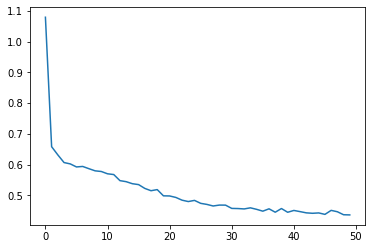

In [29]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

In [30]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_pred=y_pred.astype(int) 
y_pred=y_pred.flatten()
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
output = pd.DataFrame({'PassengerId': df.PassengerId,
                       'Survived': y_pred})
output.to_csv('submission10.csv', index=False)

# ANN-2

In [39]:
from tensorflow import keras
from tensorflow.keras import layers,callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    #layers.BatchNormalization(),
    layers.Dense(50, activation='relu', input_shape=[8]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(45, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(45, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=model.fit(X_train, y_train, batch_size =100 , epochs = 1000, callbacks=[early_stopping])

Epoch 1/1000
9/9 [==============================] - 1s 3ms/step - loss: 0.7010 - accuracy: 0.6386
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.6974
Epoch 3/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7489
Epoch 4/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5846 - accuracy: 0.7354
Epoch 5/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5434 - accuracy: 0.7598
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.5455 - accuracy: 0.7582
Epoch 7/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.7781
Epoch 8/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7789
Epoch 9/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5243 - accuracy: 0.7736
Epoch 10/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.7851
Epoch 11/1000
9/9 [

9/9 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.8149
Epoch 38/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4346 - accuracy: 0.8174
Epoch 39/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7930
Epoch 40/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7875
Epoch 41/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.7926
Epoch 42/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.7957
Epoch 43/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.8142
Epoch 44/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.8085
Epoch 45/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.7987
Epoch 46/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.7972
Epoch 47/1000
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8219
Epoch 74/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4030 - accuracy: 0.8299
Epoch 75/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3992 - accuracy: 0.8394
Epoch 76/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8136
Epoch 77/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7994
Epoch 78/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8187
Epoch 79/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4166 - accuracy: 0.8300
Epoch 80/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.8248
Epoch 81/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4320 - accuracy: 0.8226
Epoch 82/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4086 - accuracy: 0.8294
Epoch 83/1000
9/9 [=====

9/9 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.8250
Epoch 110/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8389
Epoch 111/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4285 - accuracy: 0.8163
Epoch 112/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8318
Epoch 113/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.8235
Epoch 114/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8443
Epoch 115/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8426
Epoch 116/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.8308
Epoch 117/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4305 - accuracy: 0.8264
Epoch 118/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.8265
Epoch 119/1000


Epoch 145/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.8285
Epoch 146/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.8477
Epoch 147/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8502
Epoch 148/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8395
Epoch 149/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8402
Epoch 150/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8393
Epoch 151/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.8481
Epoch 152/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8469
Epoch 153/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.8401
Epoch 154/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8282


Epoch 181/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8150
Epoch 182/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8373
Epoch 183/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8403
Epoch 184/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3856 - accuracy: 0.8374
Epoch 185/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3984 - accuracy: 0.8169
Epoch 186/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3844 - accuracy: 0.8397
Epoch 187/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4041 - accuracy: 0.8340
Epoch 188/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3932 - accuracy: 0.8351
Epoch 189/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.8228
Epoch 190/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8282


Epoch 217/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8529
Epoch 218/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3744 - accuracy: 0.8537
Epoch 219/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3871 - accuracy: 0.8402
Epoch 220/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3652 - accuracy: 0.8475
Epoch 221/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8428
Epoch 222/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3686 - accuracy: 0.8397
Epoch 223/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8546
Epoch 224/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8252
Epoch 225/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3568 - accuracy: 0.8573
Epoch 226/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3909 - accuracy: 0.8272


Epoch 253/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4001 - accuracy: 0.8391
Epoch 254/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8455
Epoch 255/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8316
Epoch 256/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3887 - accuracy: 0.8350
Epoch 257/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.8398
Epoch 258/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.8458
Epoch 259/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8376
Epoch 260/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8247
Epoch 261/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3701 - accuracy: 0.8595
Epoch 262/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3676 - accuracy: 0.8386


Epoch 289/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3701 - accuracy: 0.8513
Epoch 290/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3685 - accuracy: 0.8427
Epoch 291/1000
9/9 [==============================] - ETA: 0s - loss: 0.3597 - accuracy: 0.86 - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8415
Epoch 292/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8458
Epoch 293/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8285
Epoch 294/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8553
Epoch 295/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8262
Epoch 296/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8311
Epoch 297/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3981 - accuracy: 0.8225
Epoch 298/1000
9/9 [==============================] - 0s 3

Epoch 325/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8485
Epoch 326/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3700 - accuracy: 0.8381
Epoch 327/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8571
Epoch 328/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8406
Epoch 329/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8581
Epoch 330/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8578
Epoch 331/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3665 - accuracy: 0.8334
Epoch 332/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.4051 - accuracy: 0.8168
Epoch 333/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8393
Epoch 334/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8390


Epoch 361/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3843 - accuracy: 0.8115
Epoch 362/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8360
Epoch 363/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3691 - accuracy: 0.8419
Epoch 364/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.8665
Epoch 365/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.8464
Epoch 366/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3730 - accuracy: 0.8551
Epoch 367/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3588 - accuracy: 0.8349
Epoch 368/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3688 - accuracy: 0.8442
Epoch 369/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3816 - accuracy: 0.8573
Epoch 370/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3727 - accuracy: 0.8405


Epoch 397/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3447 - accuracy: 0.8503
Epoch 398/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8457
Epoch 399/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3605 - accuracy: 0.8534
Epoch 400/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3371 - accuracy: 0.8677
Epoch 401/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3584 - accuracy: 0.8482
Epoch 402/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8530
Epoch 403/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.8471
Epoch 404/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.8691
Epoch 405/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.8613
Epoch 406/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3632 - accuracy: 0.8384


Epoch 433/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3969 - accuracy: 0.8378
Epoch 434/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8435
Epoch 435/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3638 - accuracy: 0.8496
Epoch 436/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3612 - accuracy: 0.8496
Epoch 437/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8330
Epoch 438/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3691 - accuracy: 0.8391
Epoch 439/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8552
Epoch 440/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8649
Epoch 441/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3571 - accuracy: 0.8509
Epoch 442/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8623


Epoch 469/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3565 - accuracy: 0.8389
Epoch 470/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3219 - accuracy: 0.8550
Epoch 471/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3274 - accuracy: 0.8771
Epoch 472/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8486
Epoch 473/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3477 - accuracy: 0.8582
Epoch 474/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8508
Epoch 475/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3747 - accuracy: 0.8325
Epoch 476/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3733 - accuracy: 0.8456
Epoch 477/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8556
Epoch 478/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8612


Epoch 505/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8317
Epoch 506/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.8640
Epoch 507/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.8531
Epoch 508/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3706 - accuracy: 0.8538
Epoch 509/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.8460
Epoch 510/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.8667
Epoch 511/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3672 - accuracy: 0.8445
Epoch 512/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8697
Epoch 513/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.8386
Epoch 514/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3655 - accuracy: 0.8352


Epoch 541/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8692
Epoch 542/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8677
Epoch 543/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3292 - accuracy: 0.8628
Epoch 544/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3879 - accuracy: 0.8419
Epoch 545/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3145 - accuracy: 0.8783
Epoch 546/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3483 - accuracy: 0.8371
Epoch 547/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.8629
Epoch 548/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8652
Epoch 549/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8597
Epoch 550/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3266 - accuracy: 0.8680


Epoch 577/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3792 - accuracy: 0.8362
Epoch 578/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3639 - accuracy: 0.8385
Epoch 579/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3475 - accuracy: 0.8594
Epoch 580/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.8541
Epoch 581/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8380
Epoch 582/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3504 - accuracy: 0.8540
Epoch 583/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3398 - accuracy: 0.8576
Epoch 584/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8653
Epoch 585/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.8651
Epoch 586/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8400


Epoch 613/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3589 - accuracy: 0.8511
Epoch 614/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8567
Epoch 615/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.8630
Epoch 616/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3405 - accuracy: 0.8590
Epoch 617/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8486
Epoch 618/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8525
Epoch 619/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8789
Epoch 620/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.8553
Epoch 621/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3404 - accuracy: 0.8457
Epoch 622/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8489


Epoch 649/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3277 - accuracy: 0.8545
Epoch 650/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3115 - accuracy: 0.8744
Epoch 651/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.8635
Epoch 652/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3407 - accuracy: 0.8591
Epoch 653/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.8557
Epoch 654/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.8594
Epoch 655/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.8670
Epoch 656/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.8675
Epoch 657/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8582
Epoch 658/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.8701


Epoch 685/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8495
Epoch 686/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8814
Epoch 687/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8536
Epoch 688/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.8805
Epoch 689/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3034 - accuracy: 0.8788
Epoch 690/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.8456
Epoch 691/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3368 - accuracy: 0.8718
Epoch 692/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3468 - accuracy: 0.8581
Epoch 693/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.8540
Epoch 694/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8566


Epoch 721/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8549
Epoch 722/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3375 - accuracy: 0.8621
Epoch 723/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.8498
Epoch 724/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.8637
Epoch 725/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3361 - accuracy: 0.8680
Epoch 726/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.8828
Epoch 727/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8775
Epoch 728/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8509
Epoch 729/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8708
Epoch 730/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8611


Epoch 757/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.8593
Epoch 758/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8666
Epoch 759/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8745
Epoch 760/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3444 - accuracy: 0.8599
Epoch 761/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3103 - accuracy: 0.8658
Epoch 762/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.3155 - accuracy: 0.8691
Epoch 763/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3086 - accuracy: 0.8697
Epoch 764/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8739
Epoch 765/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8546
Epoch 766/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3593 - accuracy: 0.8536


Epoch 793/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3224 - accuracy: 0.8751
Epoch 794/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3406 - accuracy: 0.8563
Epoch 795/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3440 - accuracy: 0.8516
Epoch 796/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3372 - accuracy: 0.8685
Epoch 797/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3296 - accuracy: 0.8706
Epoch 798/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8654
Epoch 799/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8643
Epoch 800/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.8709
Epoch 801/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3199 - accuracy: 0.8748
Epoch 802/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3229 - accuracy: 0.8722


Epoch 829/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.8571
Epoch 830/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3435 - accuracy: 0.8589
Epoch 831/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3412 - accuracy: 0.8548
Epoch 832/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3567 - accuracy: 0.8481
Epoch 833/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3320 - accuracy: 0.8652
Epoch 834/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3522 - accuracy: 0.8385
Epoch 835/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3412 - accuracy: 0.8605
Epoch 836/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8746
Epoch 837/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8750
Epoch 838/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8530


Epoch 865/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8582
Epoch 866/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2930 - accuracy: 0.8881
Epoch 867/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.8657
Epoch 868/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8826
Epoch 869/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.8840
Epoch 870/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3340 - accuracy: 0.8644
Epoch 871/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.8866
Epoch 872/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8632
Epoch 873/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.8836
Epoch 874/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3406 - accuracy: 0.8568


Epoch 901/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.8629
Epoch 902/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8639
Epoch 903/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3385 - accuracy: 0.8482
Epoch 904/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3296 - accuracy: 0.8640
Epoch 905/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3263 - accuracy: 0.8686
Epoch 906/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8658
Epoch 907/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8769
Epoch 908/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2954 - accuracy: 0.8766
Epoch 909/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8787
Epoch 910/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8682


Epoch 937/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.8714
Epoch 938/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3045 - accuracy: 0.8621
Epoch 939/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3285 - accuracy: 0.8587
Epoch 940/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.8629
Epoch 941/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8543
Epoch 942/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.2918 - accuracy: 0.8942
Epoch 943/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3303 - accuracy: 0.8695
Epoch 944/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3301 - accuracy: 0.8550
Epoch 945/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8547
Epoch 946/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3643 - accuracy: 0.8527


Epoch 973/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.8670
Epoch 974/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.3588 - accuracy: 0.8539
Epoch 975/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3294 - accuracy: 0.8570
Epoch 976/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8491
Epoch 977/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8822
Epoch 978/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3264 - accuracy: 0.8660
Epoch 979/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.8718
Epoch 980/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8601
Epoch 981/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3361 - accuracy: 0.8656
Epoch 982/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8642


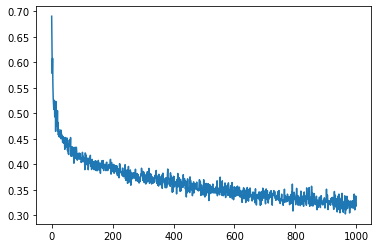

In [40]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()

In [41]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_pred=y_pred.astype(int) 
y_pred=y_pred.flatten()
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [42]:
output = pd.DataFrame({'PassengerId': df.PassengerId,
                       'Survived': y_pred})
output.to_csv('submission16.csv', index=False)